# Reading the data

## Importing the necessary libraries

In [81]:
import numpy as np
import pandas as pd

#Label Encoder
from sklearn.preprocessing import LabelEncoder

#For better EDA
import matplotlib.pyplot as plt

#For histogram
import seaborn as sns

#For deep analysis
import nltk

#Tokenization
from nltk.tokenize import word_tokenize as WordTokenizer

#For removing stopwords and pucntuations
from nltk.corpus import stopwords
import string

#For stemming
from nltk.stem.porter import PorterStemmer

#For word cloud
from wordcloud import WordCloud

#For counting the top 50 words
from collections import Counter

#For Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#For training and spliting
from sklearn.model_selection import train_test_split

#For Naive Bayes modelling
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

#For model accuracy and precision
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

#For comparing the best model on the basis of precision score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#For website
import pickle

In [82]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')

## Getting error while reading the file

Getting the 'encoding error' while reading the file becasuse the file is not in 'UTF-8' encoding format which is default. So that's why i am using the *chardet* library to finding the correct encoding format for the dataset which is *Windows-1252*.

In [83]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [84]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2540,ham,"They said if its gonna snow, it will start aro...",NaN,NaN,NaN
3049,ham,Ok,NaN,NaN,NaN
4217,ham,Actually i'm waiting for 2 weeks when they sta...,NaN,NaN,NaN
2525,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
5403,ham,So gd got free ice cream... I oso wan...,NaN,NaN,NaN
2610,ham,"As usual..iam fine, happy &amp; doing well..:)",NaN,NaN,NaN
4191,ham,&lt;#&gt; w jetton ave if you forgot,NaN,NaN,NaN
1931,ham,What pa tell me.. I went to bath:-),NaN,NaN,NaN
3861,ham,"Customer place, i wil cal u sir.",NaN,NaN,NaN
533,ham,I'll be late...,NaN,NaN,NaN


In [85]:
df.shape

(5572, 5)

## Project Workflow

### 1. Data Cleaning
### 2. Exploratory Data Analysis (EDA)
### 3. Text Preprocessing
### 4. Model Building
### 5. Evaluation
### 6. Improvement
### 7. Website
### 8. Deploy

## 1. Data Cleaning

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Droping the last three columns because it has so many null values which is not going to help us in our model building in any ways.

In [87]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [88]:
df.sample(10)

,v1,v2
463,ham,"Sorry, I'll call later ok bye"
823,spam,25p 4 alfie Moon's Children in need song on ur...
5334,ham,"Garbage bags, eggs, jam, bread, hannaford whea..."
2760,ham,I dont thnk its a wrong calling between us
4504,spam,Mobile Club: Choose any of the top quality ite...
4930,ham,"Good morning, my boytoy! How's those yummy lip..."
4775,ham,Quite lor. But dun tell him wait he get compla...
412,ham,Okies... I'll go yan jiu too... We can skip ar...
3357,ham,I don't run away frm u... I walk slowly &amp; ...
4447,ham,I sent them. Do you like?


Renaming the 'v1' and 'v2' columns to 'target' and 'text' respectively.

In [89]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [90]:
df.sample(10)

,target,text
450,ham,hanks lotsly!
2394,ham,I don't run away frm u... I walk slowly &amp; ...
3685,ham,I get out of class in bsn in like &lt;#&gt; ...
5177,ham,Very strange. and are watching the 2nd one n...
1242,ham,Nobody can decide where to eat and dad wants C...
2081,ham,I'm aight. Wat's happening on your side.
2932,ham,Yo do you know anyone &lt;#&gt; or otherwise...
1040,ham,Today am going to college so am not able to at...
2481,ham,K.:)do it at evening da:)urgent:)
4381,ham,yeah sure thing mate haunt got all my stuff so...


Using the LabelEncoder to label the values of ham and spam. Assigning the values of 0's and 1's to ham and spam respectively.

In [91]:
encoder = LabelEncoder()

In [92]:
df['target'] = encoder.fit_transform(df['target'])

In [93]:
df.sample(10)

,target,text
1456,0,U sleeping now.. Or you going to take? Haha.. ...
1885,0,I think asking for a gym is the excuse for laz...
2552,0,"Oh fine, I'll be by tonight"
2685,1,URGENT! We are trying to contact U. Todays dra...
3083,0,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...
4501,0,Wot is u up 2 then bitch?
3396,0,Heehee that was so funny tho
142,0,A swt thought: \Nver get tired of doing little...
2811,0,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
3990,0,I am on the way to ur home


Checking the missing values

In [94]:
df.isnull().sum()

target    0
text      0
dtype: int64

Checking for duplicate values

In [95]:
df.duplicated().sum()

403

There 403 dupliacte values. So we have to remove all these duplicate values

In [96]:
df = df.drop_duplicates(keep='first')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


## 2. Exploratory Data Analysis (EDA)

Checking the values distribitions of ham and spam within the target column

In [98]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

Understanding the percentages of our target column values with pie chart

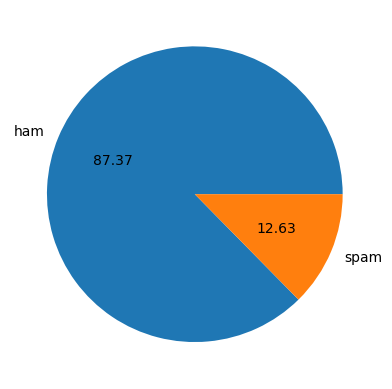

In [99]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f");

From the above pie chart. We see that there are 87.37% messages are not spam in our dataset while there 12.9% messages are spam. So we can say that-

*Our Data is imabalanced*

For deep analysis we are going to make three columns with nltk library

First column

Finding the numbers of characters in each messages. And saving it to the new column which will be called as 'num_characters'.

In [100]:
df['num_characters'] = df['text'].apply(len)

In [101]:
df.sample(5)

,target,text,num_characters
4218,0,Anything lor if they all go then i go lor...,44
3210,0,"OH YEAH,AND HAV A GREAT TIME IN NEWQUAY-SEND M...",131
3674,0,Whos this am in class:-),24
909,1,"January Male Sale! Hot Gay chat now cheaper, c...",155
3758,0,"GOD ASKED, \What is forgiveness?\"" A little ch...",67


Second column

For second column, we are going to fetching the number of words from each messages using nltk library

In [102]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [103]:
df.sample(10)

,target,text,num_characters,num_words
4072,0,Was the actual exam harder than NBME,36,7
3499,1,Dorothy@kiefer.com (Bank of Granite issues Str...,156,45
2710,1,Hope you enjoyed your new content. text stop t...,118,18
4849,0,Maybe you should find something else to do ins...,53,12
2025,0,"Yes obviously, but you are the eggs-pert and t...",76,15
677,0,"Piggy, r u awake? I bet u're still sleeping. I...",69,20
4464,0,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...,99,17
3160,0,Mystery solved! Just opened my email and he's ...,87,20
70,0,Wah lucky man... Then can save money... Hee...,46,11
751,1,You have an important customer service announc...,65,10


Third column

For this, we are going to count the nunber of sentences

In [104]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [105]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences
1881,0,Ok.. ÌÏ finishing soon?,23,6,1
227,0,Hey company elama po mudyadhu.,30,6,1
5398,0,Hi. Hope you had a good day. Have a better night.,49,14,3
973,0,what is your account number?,28,6,1
2065,0,Cos daddy arranging time c wat time fetch Ì_ m...,51,11,1
1780,1,BIG BROTHER ALERT! The computer has selected u...,154,31,4
3887,0,ok....take care.umma to you too...,34,8,1
5240,0,"Gud gud..k, chikku tke care.. sleep well gud nyt",48,13,1
3752,0,Ya that one is slow as poo,26,7,1
650,0,Thats cool! Sometimes slow and gentle. Sonetim...,66,14,3


In [106]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


Ham messages analysis

In [107]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


Spam messages analysis

In [108]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


From the above analysis, we can say that we have our mean of both ham and spam are 70 and 137 respectively and so on. This shows that on an average spam messages are longer and bigger than ham messages.

Let's understand the same with the help of histogram

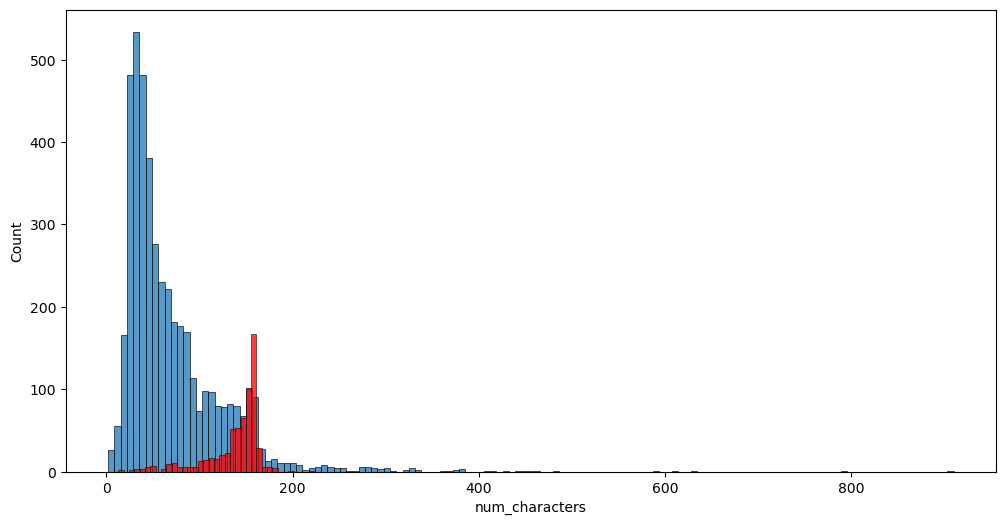

In [109]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red');

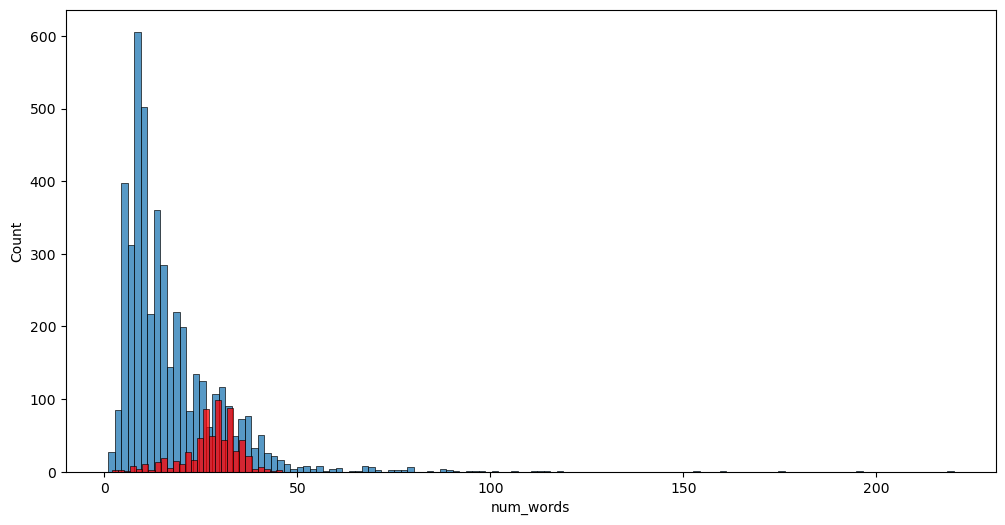

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red');

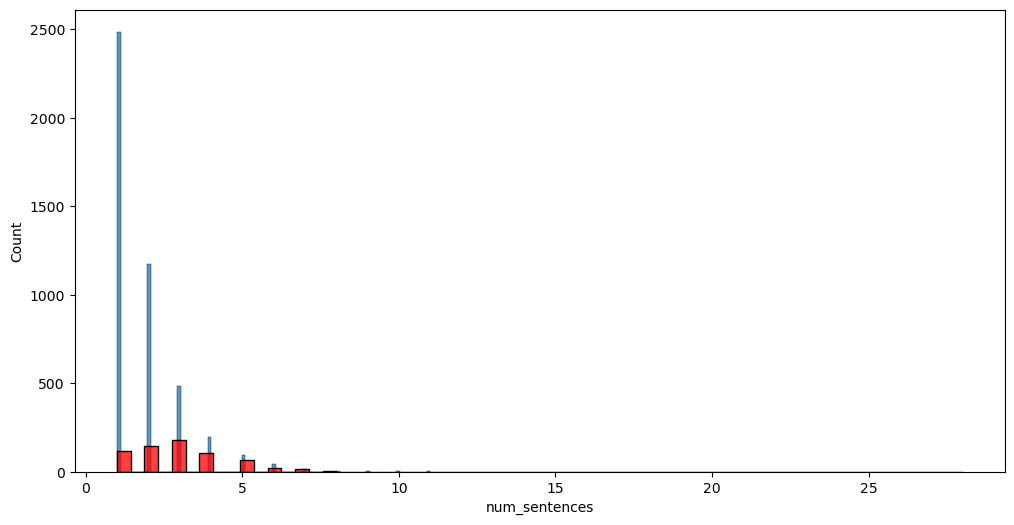

In [111]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red');

From all the three above histograms, it is clear that on an average ham messages are longer than spam messages in every aspect

Now, let's see the pairplot to see how they corelated to each other

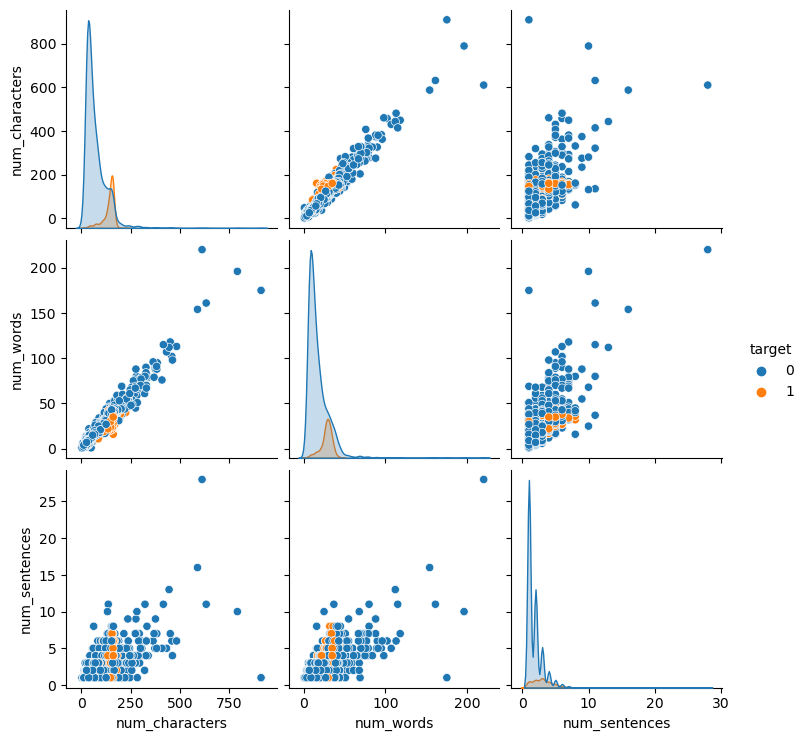

In [112]:
sns.pairplot(df, hue='target');

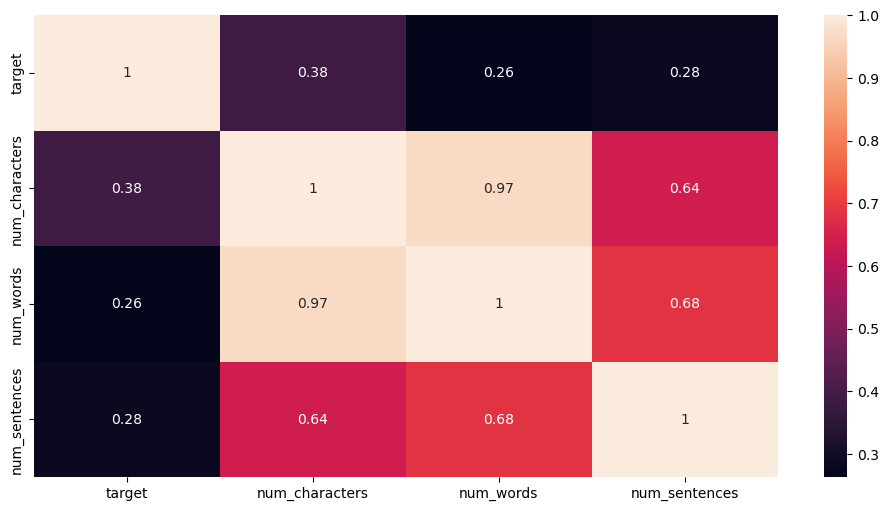

In [113]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True);

## 3. Data Preprocessing

 #### Lower case
 #### Tokenization
 #### Removing special characters
 #### Removing stop words and punctuation
 #### Stemming

In [114]:
def transform_text(text):
    text = text.lower() # lower case
    
    text = WordTokenizer(text) # tokenization
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i) # removing special characters
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) # removing stop words and punctuations
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    
    
    for i in text:
        y.append(ps.stem(i)) # stemming
    
    return " ".join(y)

In [115]:
transforming_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

Now that we have our transforming_text function doing all of our transformation which is required for our model building and save it into a new column

In [116]:
df['transformed_text'] = df['text'].apply(transforming_text)

In [117]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
332,1,Call Germany for only 1 pence per minute! Call...,128,28,4,call germani 1 penc per minut call fix line vi...
3573,0,Yeah sure I'll leave in a min,29,8,1,yeah sure leav min
1149,0,Not a drop in the tank,22,6,1,drop tank
239,1,U 447801259231 have a secret admirer who is lo...,145,27,1,u 447801259231 secret admir look 2 make contac...
558,0,Hi Princess! Thank you for the pics. You are v...,70,18,4,hi princess thank pic pretti
454,1,"Loan for any purpose å£500 - å£75,000. Homeown...",164,33,5,loan purpos homeown tenant welcom previous ref...
5442,0,"I thought i'd get him a watch, just cos thats ...",99,25,2,thought get watch co that kind thing u get4an1...
2875,0,Fuck cedar key and fuck her (come over anyway ...,50,12,1,fuck cedar key fuck come anyway tho
1754,0,How is your schedule next week? I am out of to...,62,15,2,schedul next week town weekend
3860,1,Free Msg: Ringtone!From: http://tms. widelive....,109,20,3,free msg rington http wml 37819


Making wordcloud for most repetative words in spam values

In [118]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [119]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

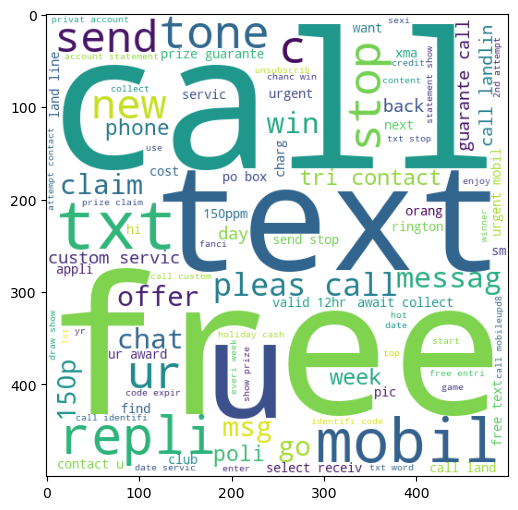

In [120]:
plt.figure(figsize=(20,6))
plt.imshow(spam_wc);

Making wordcloud for most repetative words in ham values

In [121]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

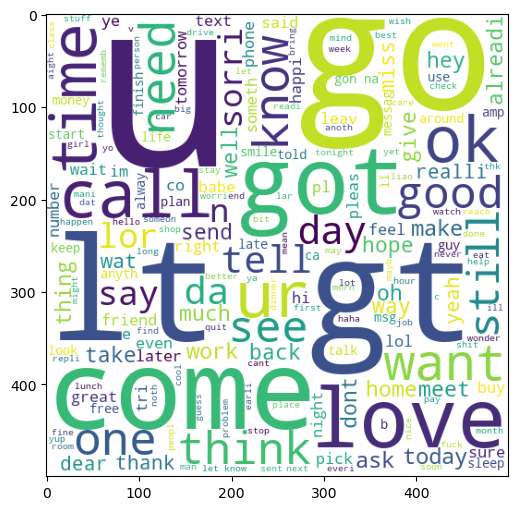

In [122]:
plt.figure(figsize=(20,6))
plt.imshow(ham_wc);

Now, let's find out the top 50 words in spam messages

In [123]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [124]:
len(spam_corpus)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


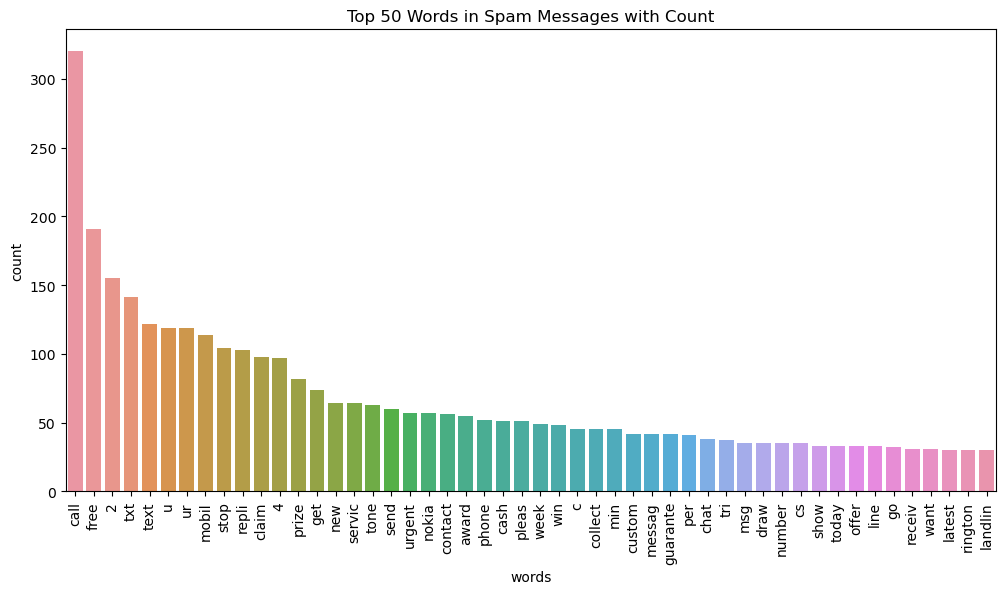

In [125]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(50))[0], pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xlabel('words')
plt.ylabel('count')
plt.title("Top 50 Words in Spam Messages with Count")
plt.xticks(rotation='vertical');

Let's do the same for ham messages for finding the top 50 words in it

In [126]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [127]:
len(ham_corpus)

35394

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


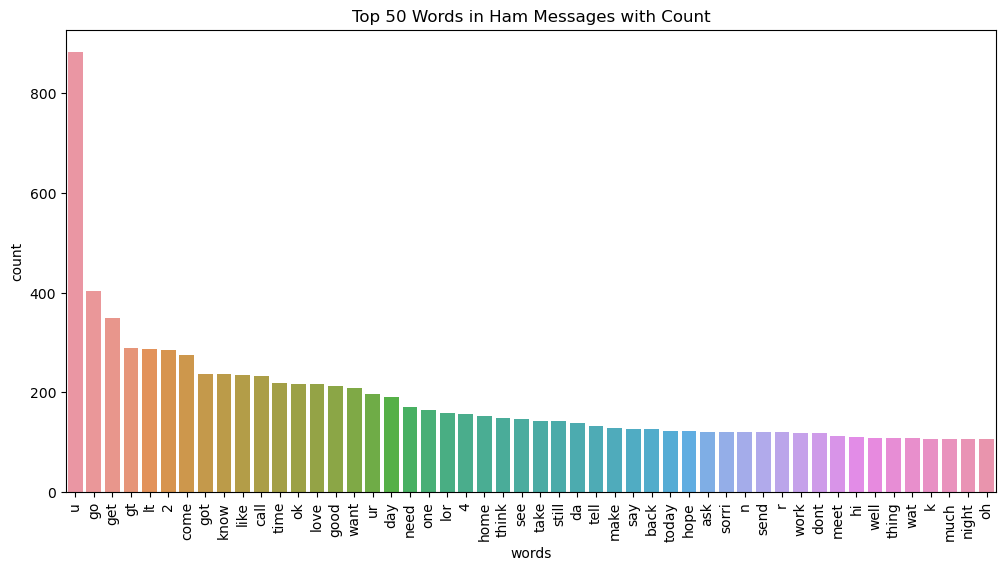

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0], pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.xlabel("words")
plt.ylabel('count')
plt.title("Top 50 Words in Ham Messages with Count");

## 4. Model Building

First, we try to make our model with naive bayes algorithm, later we would try more algorithm to find out which algorithm works best for our model

For input, we are going to use *Beg of Words Vectorization*

In [129]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [130]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [131]:
X.shape

(5169, 6708)

In [132]:
y = df['target'].values

In [133]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [135]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [136]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [137]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [138]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


So far, we got good accuracy score and as well as good precision score with Bernoulli Naive Bayes Model. But we are now going to try another vectorization with TfidfVectorizer

In [139]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [140]:
X.shape

(5169, 6708)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [142]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [143]:
rfc.fit(X_train, y_train)
y_pred1 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9738878143133463
[[896   0]
 [ 27 111]]
1.0


In [144]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [145]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


With using TfidfVectorizer with Multinomial Navie Bayes Model, we are getting the precision score of 1, which menas our model is not making any mistake to predicting ham and spam messages. So that's why we are going to proceed with Multinomial Naive Bayes Model with TfidfVectorizer

## 5. Evaluation

Now, we are going to compare our Multinomial Bayes Model with all the other classifier model so that we will be sure that we are getting the best precision scoring model

In [146]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [147]:
clfs = {
    'LRC' : lrc,
    'SVC' : svc,
    'MNB' : mnb,
    'DTC' : dtc,
    'KNC' : knc,
    'RFC' : rfc,
    'ABC' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [148]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [149]:
train_classifier(lrc, X_train, y_train, X_test, y_test)

(0.9516441005802708, 0.94)

In [150]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For LRC
Accuracy -  0.9516441005802708
Precision -  0.94
For SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For MNB
Accuracy -  0.9593810444874274
Precision -  1.0
For DTC
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For KNC
Accuracy -  0.9003868471953579
Precision -  1.0
For RFC
Accuracy -  0.9738878143133463
Precision -  1.0
For ABC
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For BC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For GBC
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For XGB
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968


In [151]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [152]:
performance_df

,Algorithm,Accuracy,Precision
2,MNB,0.959381,1.000000
4,KNC,0.900387,1.000000
5,RFC,0.973888,1.000000
8,ETC,0.975822,0.982906
1,SVC,0.972921,0.974138
6,ABC,0.961315,0.945455
0,LRC,0.951644,0.940000
10,XGB,0.969052,0.934426
9,GBC,0.952611,0.923810
7,BC,0.958414,0.862595


From the above dataframe, we can see that Multinomial Naiye Bayes and Random Forest Classifier has the precision score of 1. We are not considering KNeighbors Classifier because it has low accuracy rate.

So, we are now going further with Random Forest Classifier because it has perfect 1 score of precision and also it has 0.97 score for accuraucy which is more than 0.95 of Multinomial Naive Baye's precision score.

## 6. Model Improvement

In [153]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))

In [154]:
pickle.dump(transforming_text, open('transform_text', 'wb'))